## Aufgabe 5 

### (a) 

Es wird ein Algorithmus zur Transformation einer Gleichverteilung im Bereich 0 bis 1 auf den Bereich $x_\text{min}$ bis $x_\text{max}$ beschrieben. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(4)
generator = np.random.uniform(0,1,1000)


In [2]:
def gleichingrenzen(xmin, xmax, anzahl): 
    generator = np.random.uniform(0,1, anzahl)
    return np.array((xmax-xmin) * generator + xmin)

In [3]:
def gleich2exponential(tau): 
    return -np.log(1-generator)*tau  

In [4]:
def gleich2potenz(xmin, n): # noch falsch
    if n >= 2:
        return xmin*(1-generator)**(-1/n) 
    else: print("Bitte geben sie einen Wert für n größer oder gleich 2 ein.")

In [5]:
def gleich2cauchy():
    return np.tan(np.pi*generator) #Herleitung?

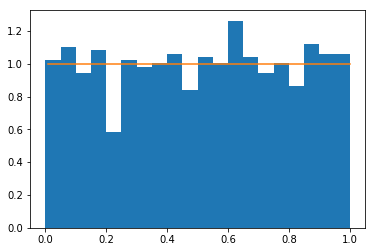

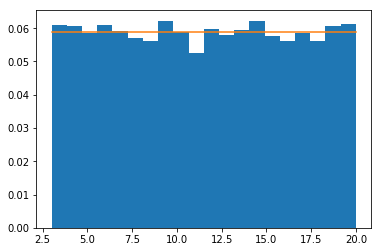

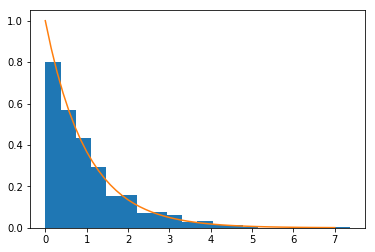

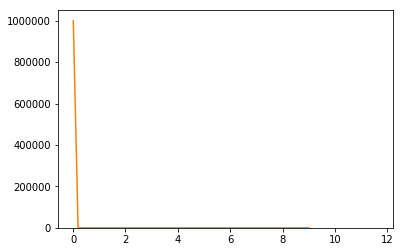

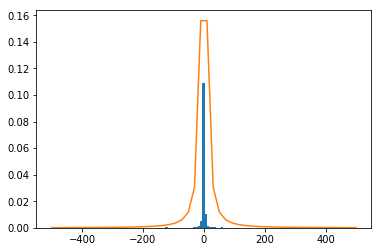

In [6]:
#Test 
#Normale Gleichverteilung
a0 = generator
def gleichverteilt(a, b, x):
    return 1/(b-a) *x/x
plt.figure(0)
plt.hist(a0, bins= 20, density=True);
plt.plot(np.linspace(0.01 ,1), gleichverteilt(0, 1, np.linspace(0.01,1)))

#Gleichverteilung mit Grenzen zwischen 3 und 20
a1 = gleichingrenzen(3,20, 10000)
plt.figure(1)
plt.hist(a1, bins= 20, density= True);
plt.plot(np.arange(3,21), gleichverteilt(3, 20, np.arange(3,21)))

#Exponentialgesetz mit Tau = 1 
def exp(tau, x):
    return 1/tau * np.exp(-x/tau)
a2 = gleich2exponential(1)
plt.figure(2)
plt.hist(a2, bins=20, density=True);
plt.plot(np.linspace(0,7), exp(1, np.linspace(0,7)))

#Potenzgesetz mit n= 3
def potenz(n, x):
    return x**(-n)
a3 = gleich2potenz(1, 3)
plt.figure(3)
plt.hist(a3, bins=20, density =True)
plt.plot(np.linspace(0.01,9), potenz(3, np.linspace(0.01, 9)))

#Cauchyverteilung
def cauchy(x):
    return 1/np.pi * 1/(1+x**2)
a4 = gleich2cauchy()
plt.figure(4)
plt.hist(a4, bins= 80, density=True);
plt.plot(np.linspace(-500,500), cauchy(np.linspace(-50, 50)))
None

In [7]:
def neumann(x,y):
    u1, u2 = gleichingrenzen(0,1, 10**5), gleichingrenzen(0, np.amax(y), 10**5) 
    u = []
    for i in range(len(u1)):
        index = np.argwhere((x < u1[i]+0.01) & (x >= u1[i]-0.01))
        if y[index[0,0]] > u2[i]:
            u = np.append(u, u1[i])
    return u

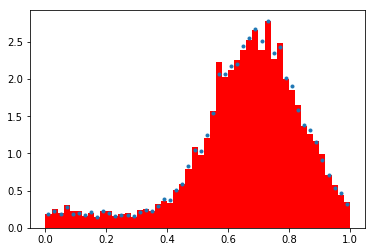

In [8]:
x,y = np.genfromtxt("empirisches_histogramm.csv", delimiter=",", unpack=True)
x = np.delete(x, 0)
y = np.delete(y, 0)
N = np.sum(0.02*y)
y = y/N
plt.figure(5)
plt.plot(x, y, "."); 
plt.hist(neumann(x,y), bins=50, color="red", density=True);
None

## Aufgabe 6 

### (a) 
Es soll ein Zufallszahlengenerator nach dem vorgegebenen Schema programmiert werden. Dabei sollen $b=3$ und $m = 1024$ gesetzt werden. 
Die Periodenlänge soll in Abhängigkeit von $a$ in einem angemessenen Bereich verwendet werden. 
Der Zusammenhang wird in einem Plot dargestellt. 


In [9]:
def lgc(n, a):
    x = np.array([10])
    for i in range(n):
        x = np.append(x, (a*x[i]+3)%1024) 
    return x    



In [10]:
# Test
def testfunc(a, max):
    anzahl = np.array([2])
    for i in range(1, a):
        for j in range(2, max):
            if lgc(j, i)[-1] == lgc(j, i)[-2]:
                anzahl = np.append(anzahl, j)
                break
            elif (j == max -1):
                anzahl = np.append(anzahl, j)
    return anzahl


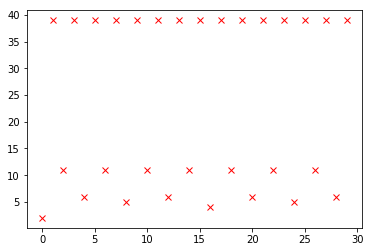

In [11]:
b = 30
y = testfunc(b, 40)
a = np.arange(0, b)

plt.figure(6)
plt.plot(a, y, "rx")
None

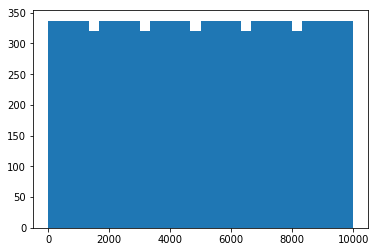

In [12]:
def newlgc(n, seeed):
    x = np.array([seeed])
    for i in range(n):
        x = np.append(x, (1601*x[i]+3456)%10000) 
    return x    

a = newlgc(10001, 20) #verschiedene Seeeds testen?, vielleicht for loop
b = newlgc(10001, 20)
plt.figure(7)
plt.hist(a, bins= 30);

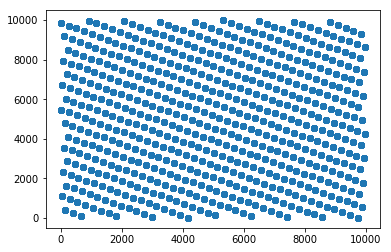

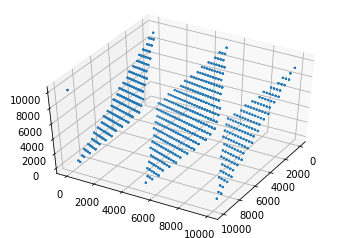

In [13]:
#2D 
neu1 = a[0::2]
neu2 = a[1::2]

plt.figure(8)
ax = plt.scatter(neu1, neu2)

#3D
new1 = b[0::3]
new2 = b[1::3]
new3 = b[2::3]

fig = plt.figure(9)
ax = fig.add_subplot(111 , projection ='3d')

ax.view_init(45, 30) # Elevation , Rotation
ax.scatter(
new1, new2, new3,
lw=0, # no lines around points
s=5,  # smaller points
)
None

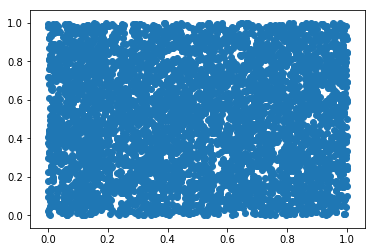

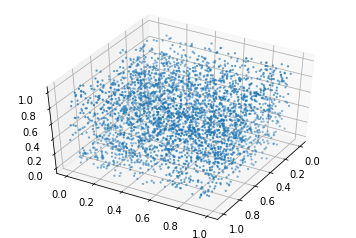

In [14]:
#2D
a = np.random.uniform(0,1, 10000)
neu1 = a[0::2]
neu2 = a[1::2]

plt.figure(8)
ax = plt.scatter(neu1, neu2)

#3D
b = np.random.uniform(0,1,10002)
new1 = b[0::3]
new2 = b[1::3]
new3 = b[2::3]

fig = plt.figure(9)
ax = fig.add_subplot(111 , projection ='3d')

ax.view_init(45, 30) # Elevation , Rotation
ax.scatter(
new1, new2, new3,
lw=0, # no lines around points
s=5,  # smaller points
)
None

In [15]:
for p in range(200):
    a = newlgc(10001, 0.1*p)
    j = 0
    for i in range(10000):
        if (a[i] == 0.5):
            j = j+1
    if j != 0:
        print(j, "x bei Seeed ", p*0.1, sep="")

16x bei Seeed 0.5
16x bei Seeed 16.5
